<a href="https://colab.research.google.com/github/Frorozcoloa/neuromatch_team_2/blob/main/0-1-analisys_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install datasets wordcloud spacy disaggregators
!python -m spacy download en_core_web_lg

2023-07-13 13:25:20.704316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
# Utilies functions
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud

def create_word_cloud(series):
    # Combine all text from the series into a single string
    text = ' '.join(series.tolist())

    # Load spaCy's English language model
    nlp = spacy.load('en_core_web_sm')

    # Create a set of spaCy's English stop words
    stopwords = set(nlp.Defaults.stop_words)

    # Step 4: Create an instance of WordCloud and generate the word cloud
    wordcloud = WordCloud(stopwords=stopwords).generate(text)

    # Step 6: Display the word cloud using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [3]:
from datasets import load_dataset
dataset = load_dataset("quocanh34/mental_health_dataset_1")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/151288 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/quocanh34___parquet/quocanh34--mental_health_dataset_1-a7427549bb4961d1/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['author', 'body', 'created_utc', 'id', 'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio', 'url'],
        num_rows: 151288
    })
})

In [5]:
df = dataset["train"].to_pandas()

In [6]:
df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...


<Axes: >

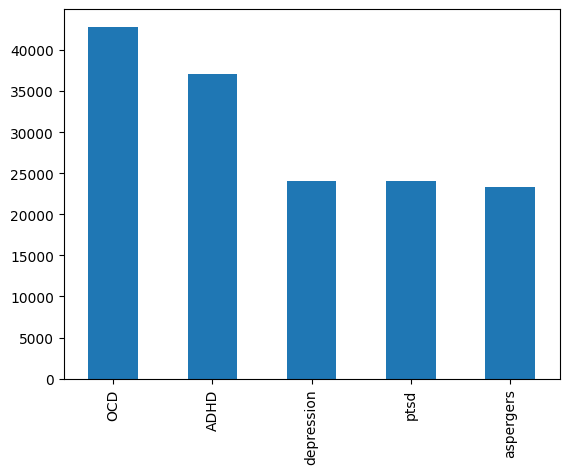

In [7]:
df.subreddit.value_counts().plot.bar()

In [8]:
df.body.isnull().sum()

1609

In [9]:
df.title.isnull().sum()

0

In [10]:
df[df.body.isnull()]

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
37140,5ss5-,None,2021-12-23T02:25:35.000Z,rml5lg,1,5,aspergers,Anyone have a item of clothing that they want ...,1.00,https://www.reddit.com/r/aspergers/comments/rm...
37178,throwRA50950,None,2021-12-22T13:54:51.000Z,rm5pkb,5,11,aspergers,Have a college degree. Now working towards my ...,0.84,https://www.reddit.com/r/aspergers/comments/rm...
37179,poke000,None,2021-12-22T13:41:47.000Z,rm5hhb,2,1,aspergers,NDs: When was a time someone seemed to misinte...,1.00,https://www.reddit.com/r/aspergers/comments/rm...
37200,BitsAndBobs304,None,2021-12-22T02:24:53.000Z,rlumwc,4,1,aspergers,What communal spaces do you wish were more acc...,0.67,https://www.reddit.com/r/aspergers/comments/rl...
37216,oswald_cobblepot444,None,2021-12-21T22:51:20.000Z,rlqdy6,3,5,aspergers,I feel like buddy the elf on a daily basis.,1.00,https://www.reddit.com/r/aspergers/comments/rl...
...,...,...,...,...,...,...,...,...,...,...
150763,domeric_bolton11,None,2019-08-04T03:22:22.000Z,clrpl5,10,85,ptsd,"when the ""employee rights"" mandatory meeting i...",0.97,https://www.reddit.com/r/ptsd/comments/clrpl5/...
150813,agirlhasnoname17,None,2019-07-31T22:40:48.000Z,ckfnim,2,3,ptsd,How long does Klonopin stay in your system and...,1.00,https://www.reddit.com/r/ptsd/comments/ckfnim/...
150902,[deleted],None,2019-07-28T02:41:27.000Z,ciqkw5,5,1,ptsd,Does anyone else have a family member that mis...,1.00,https://www.reddit.com/r/ptsd/comments/ciqkw5/...
150975,[deleted],None,2019-07-24T18:21:45.000Z,chbw2k,2,4,ptsd,I had my first kiss when I was 14. It was only...,1.00,https://www.reddit.com/r/ptsd/comments/chbw2k/...


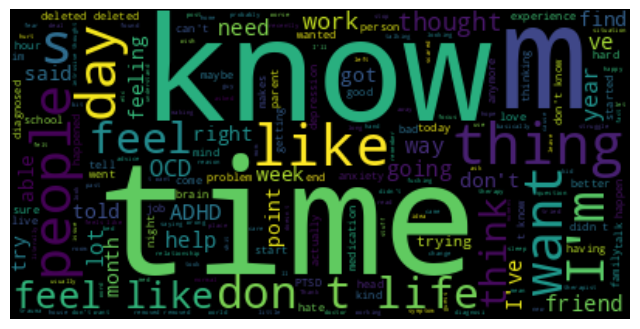

In [11]:
df_plot = df.body.copy()
df_plot.dropna(inplace=True)
create_word_cloud(df_plot)

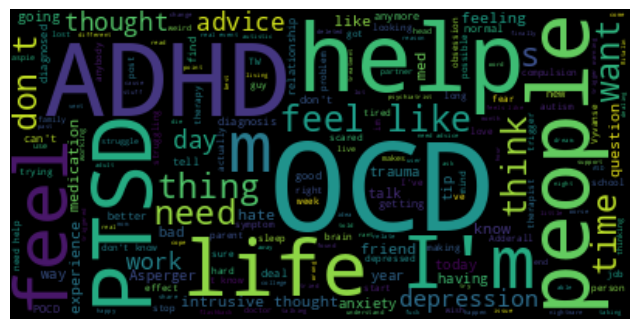

In [12]:
create_word_cloud(df.title)

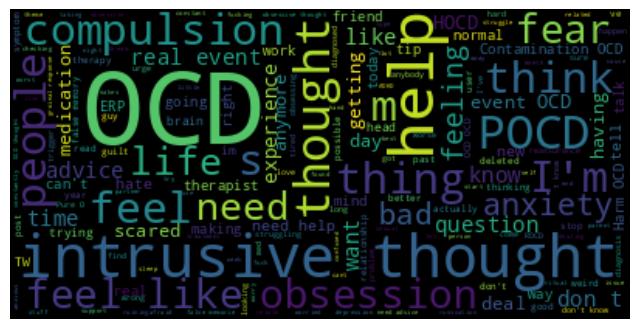

In [13]:
create_word_cloud(df[df.subreddit=="OCD"].title)

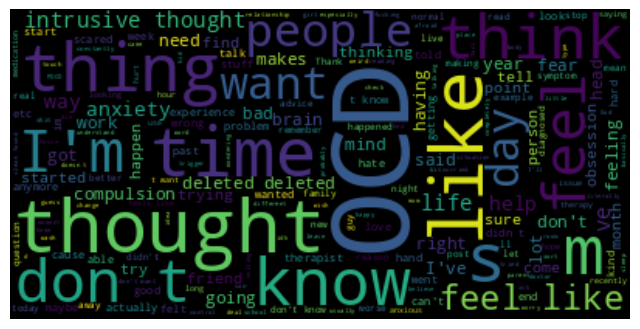

In [14]:
def plot_body(subreddit):
  df_plot = df.copy()
  df_plot = df_plot.dropna()
  create_word_cloud(df_plot[df_plot.subreddit==subreddit].body)
plot_body("OCD")

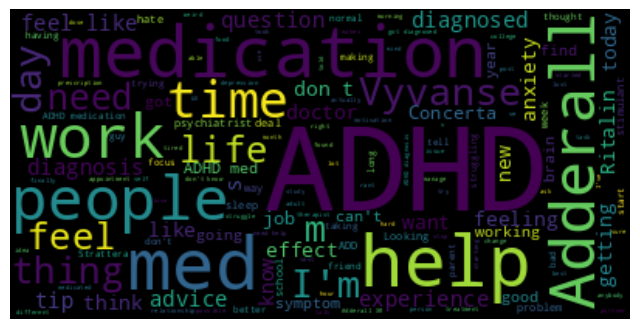

In [15]:
create_word_cloud(df[df.subreddit=="ADHD"].title)

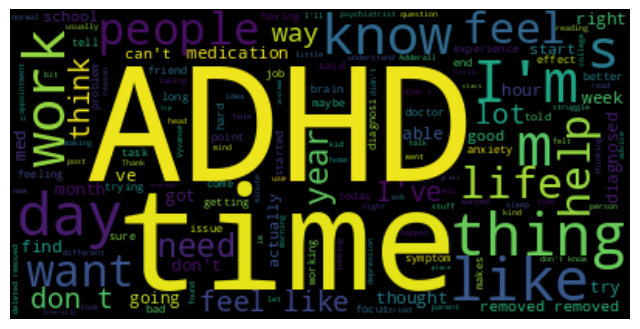

In [16]:
plot_body("ADHD")

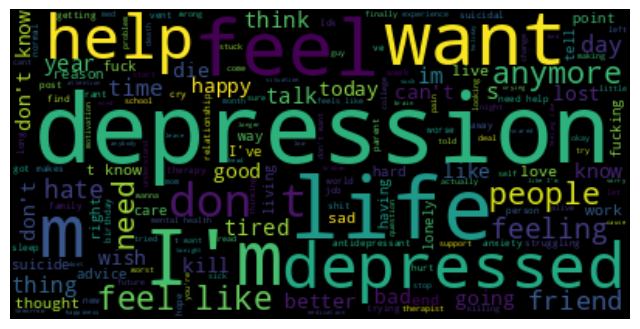

In [17]:
create_word_cloud(df[df.subreddit=="depression"].title)

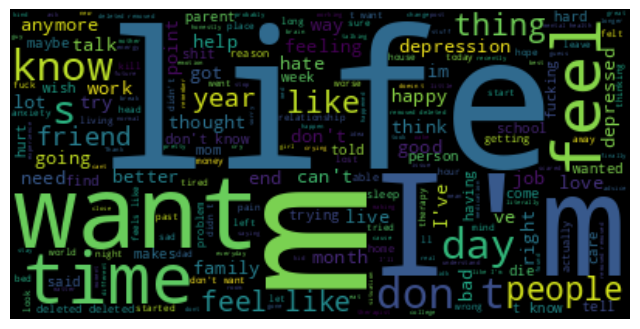

In [18]:
plot_body("depression")

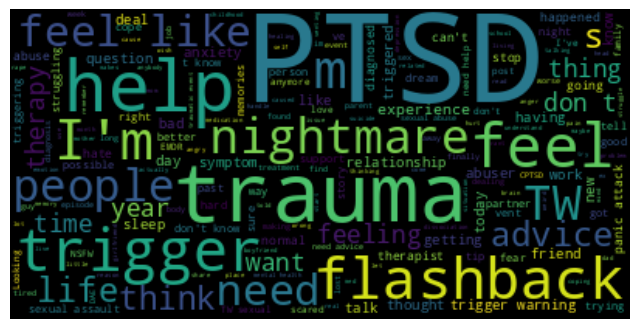

In [19]:
create_word_cloud(df[df.subreddit=="ptsd"].title)

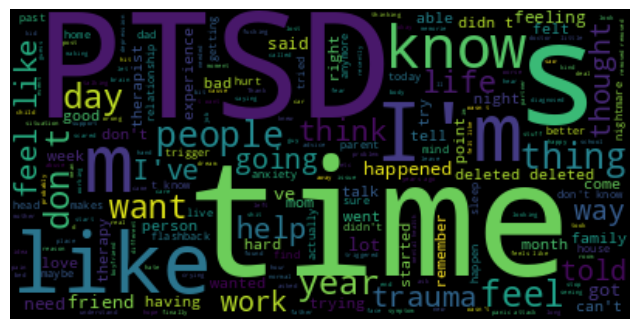

In [20]:
plot_body("ptsd")

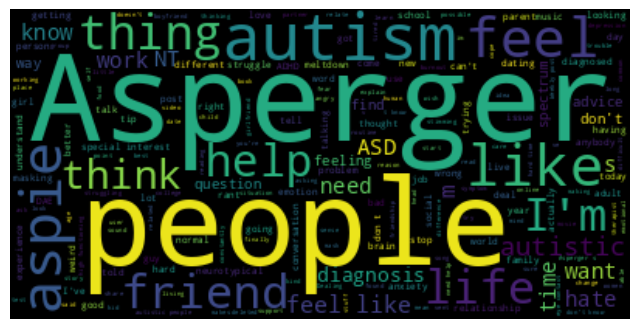

In [21]:
create_word_cloud(df[df.subreddit=="aspergers"].title)

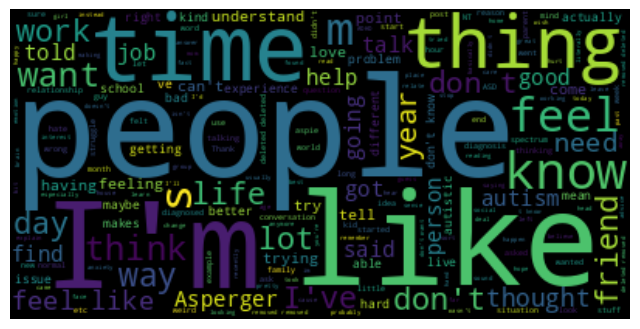

In [22]:
plot_body("aspergers")

#  Disaggregator
I uses this library to see the bias in the dataset

In [23]:
from disaggregators import Disaggregator
disaggregator = Disaggregator("pronoun", column="title")

new_cols = df.apply(disaggregator, axis=1)
new_cols = pd.json_normalize(new_cols)

<Axes: >

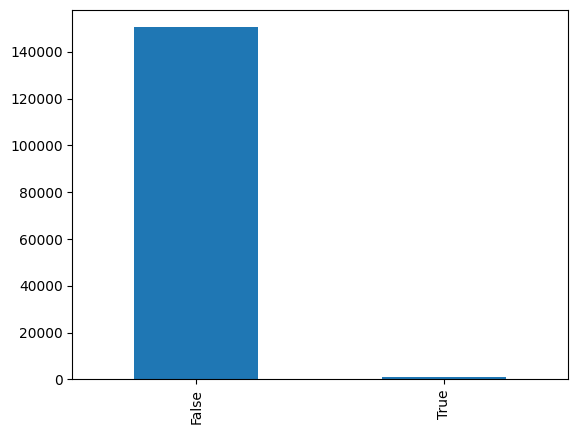

In [24]:
new_cols["pronoun.he_him"].value_counts().plot.bar()

<Axes: >

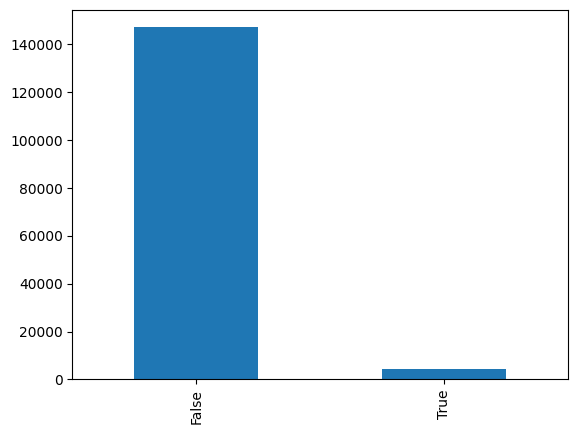

In [25]:
new_cols["pronoun.they_them"].value_counts().plot.bar()

<Axes: >

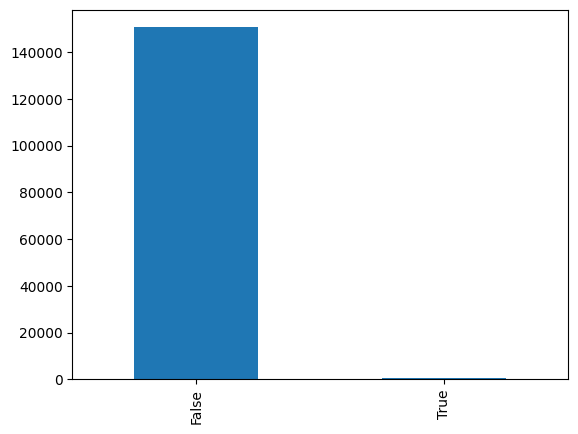

In [26]:
new_cols["pronoun.she_her"].value_counts().plot.bar()

In [ ]:
disaggregator = Disaggregator("gender", column="title")

new_cols = df.apply(disaggregator, axis=1)
new_cols = pd.json_normalize(new_cols)

In [ ]:
def plot_boby(df:pd.DataFrame, topic):
  '''
  The dataframe has null values
  Fields:
    df: Is a dataframe to uses
    topic: is the topic that uses desagregator ("age", "gender","pronoun","religion","continent")